In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
import os
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image
import re

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
def string_to_json(string):
    try:
        for i in range(len(re.findall("[A-Za-z]'[A-Za-z ]",string))):
            try:
                string = string[:string.find(re.findall("[A-Za-z]'[A-Za-z ]",string)[0])+1] + string[string.find(re.findall("[A-Za-z]'[A-Za-z ]",string)[0]) + 3:]
            except:
                continue
        string = string.replace("'", '"')  
        while (string.find(": None")!=-1):
            string = string[:string.find(": None")+2] + "\"" + string[string.find(": None")+2:string.find(": None")+6] + "\"" + string[string.find(": None")+6:]
        outputjson = json.loads(string)
    except:
        outputjson = []
    return outputjson

In [4]:
##English and non-English films

In [5]:
def is_en(df):
    df['is_english'] = 0
    df.loc[train['original_language']=="en", 'is_english'] = 1
    return df

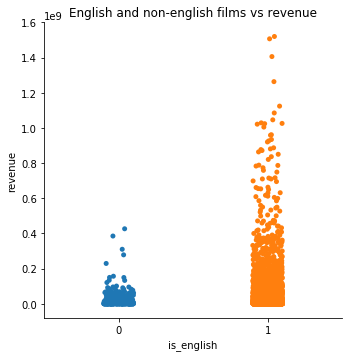

In [7]:
is_en(train)
sns.catplot(x='is_english', y='revenue', data=train)
plt.title('English and non-english films vs revenue')
plt.savefig('Images\English and non-english films vs revenue.png')

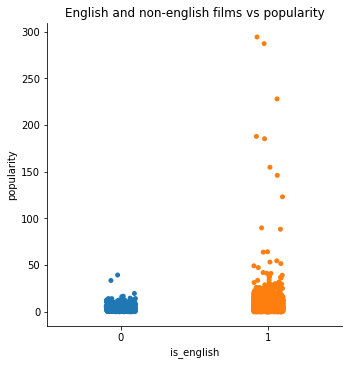

In [8]:
sns.catplot(x='is_english', y='popularity', data=train)
plt.title('English and non-english films vs popularity')
plt.savefig('Images\English and non-english films vs popularity.png')

In [24]:
##Keywords

In [25]:
#occurences of length of keywords
train['Keywords'].apply(lambda x: len(x) if not(pd.isna(x)) else 0).value_counts().head(10)

0      276
43      30
42      25
70      19
35      17
171     16
107     16
33      16
142     15
34      15
Name: Keywords, dtype: int64

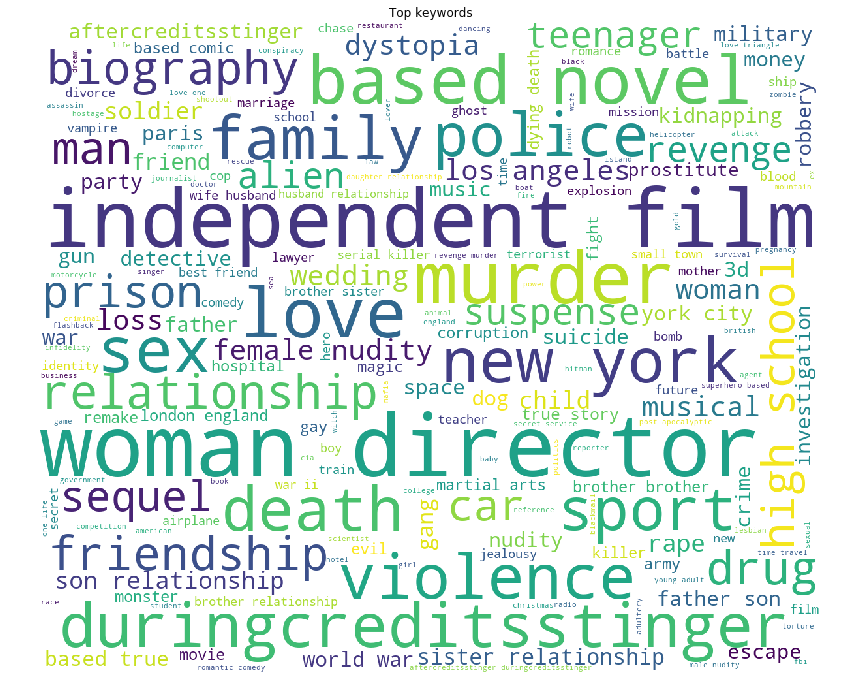

In [26]:
keywords = []
train['Keywords'].apply(lambda x: [keywords.append(Keyword['name']) for Keyword in string_to_json(x)] if not(pd.isna(x)) else 0)
all_keywords = '' 
for keyword in keywords: 
    keyword = str(keyword) 
    tokens = keyword.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    all_keywords += " ".join(tokens)+" "
plt.figure(figsize = (16, 12))
wordcloud = WordCloud(background_color='white',width=1200, height=1000).generate(all_keywords)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.savefig('Images\Top keywords In word cloud.png')
plt.show()

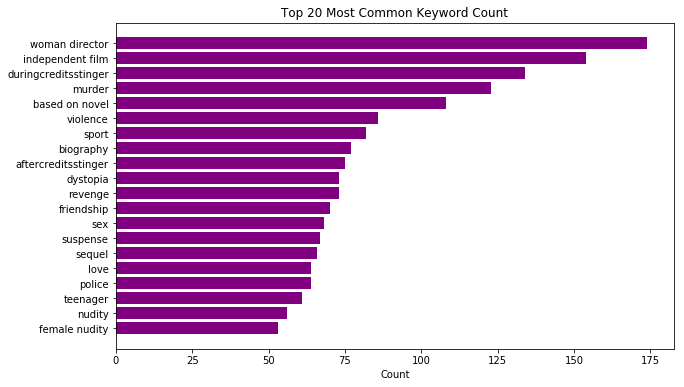

In [27]:
common_keywords=Counter([j for j in keywords]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(common_keywords)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Keyword Count')
plt.savefig('Images\Top keywords In plot.png')
plt.show()

In [28]:
#Crew

In [29]:
#occurences of length of crew
train['crew'].apply(lambda x: len(x) if not(pd.isna(x)) else 0).value_counts().head(10)

0      16
376    10
324     9
355     8
326     8
162     7
320     7
378     7
380     7
382     7
Name: crew, dtype: int64

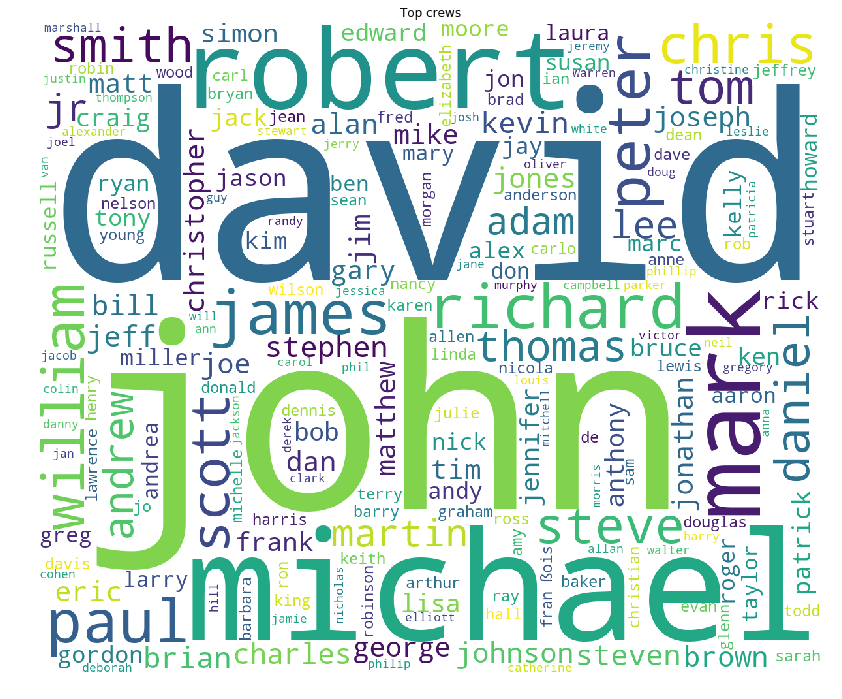

In [30]:
crews_name = []
crews_job = []
train['crew'].apply(lambda x: [(crews_name.append(crew["name"]),crews_job.append(crew["job"])) for crew in string_to_json(x)] if not(pd.isna(x)) else 0)
all_crews = '' 
for crew in crews_name: 
    crew = str(crew) 
    tokens = crew.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    all_crews += " ".join(tokens)+" "
plt.figure(figsize = (16, 12))
wordcloud = WordCloud(background_color='white',width=1200, height=1000).generate(all_crews)
plt.imshow(wordcloud)
plt.title('Top crews')
plt.axis("off")
plt.show()

In [31]:
crews_data = pd.DataFrame({'name':crews_name, 'job':crews_job})
crews_data.head(5)

,name,job
0,Kelly Cantley,First Assistant Director
1,Steve Pink,Director
2,Josh Heald,Writer
3,Josh Heald,Characters
4,Andrew Panay,Producer


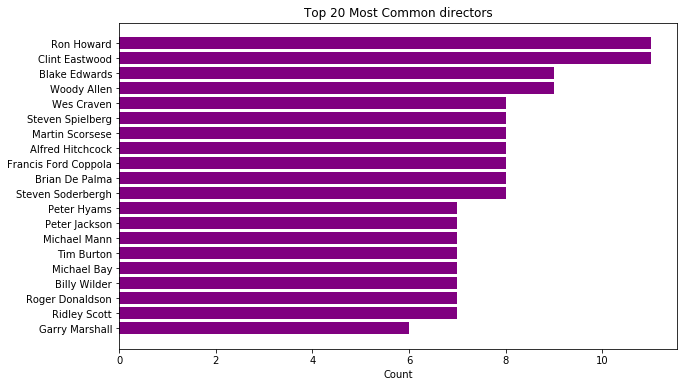

In [32]:
directors_df = crews_data[crews_data["job"]=="Director"]
directors = directors_df['name'].tolist()
common_directors=Counter([j for j in directors]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(common_directors)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common directors')
plt.savefig('Images\Top directors.png')
plt.show()

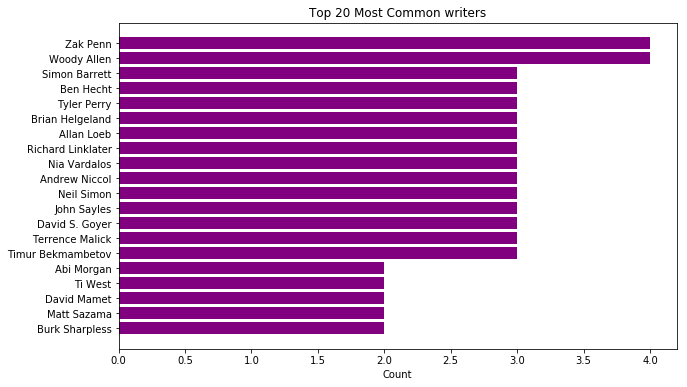

In [33]:
writers_df = crews_data[crews_data["job"]=="Writer"]
writers = writers_df['name'].tolist()
common_writers=Counter([j for j in writers]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(common_writers)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common writers')
plt.savefig('Images\Top writers.png')
plt.show()

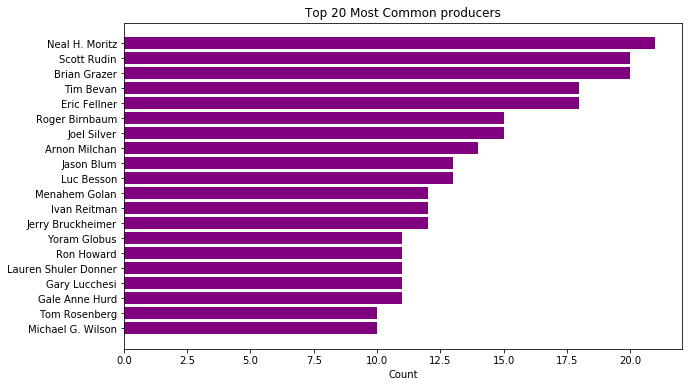

In [34]:
producers_df = crews_data[crews_data["job"]=="Producer"]
producers = producers_df['name'].tolist()
common_producers=Counter([j for j in producers]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(common_producers)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common producers')
plt.savefig('Images\Top producers.png')
plt.show()

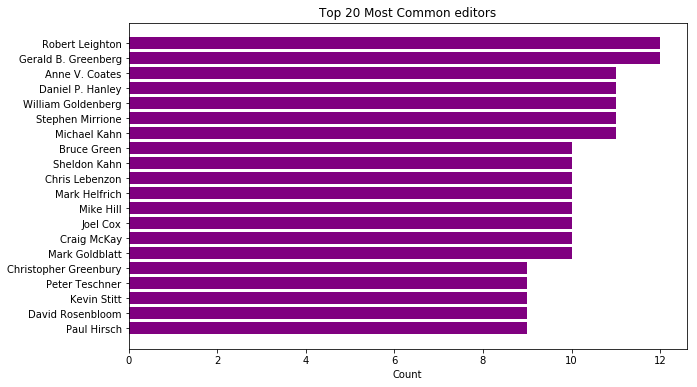

In [35]:
editors_df = crews_data[crews_data["job"]=="Editor"]
editors = editors_df['name'].tolist()
common_editors=Counter([j for j in editors]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(common_editors)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common editors')
plt.savefig('Images\Top editors.png')
plt.show()

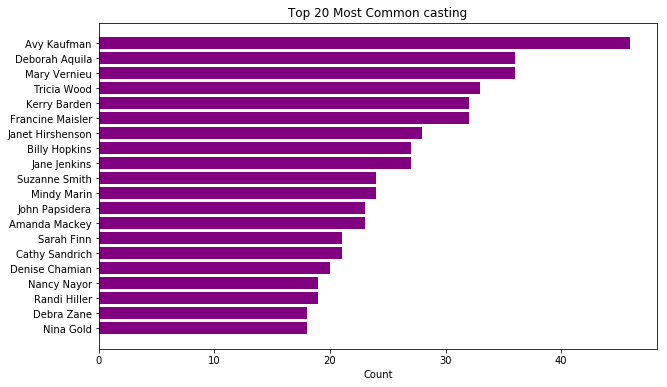

In [36]:
casting_df = crews_data[crews_data["job"]=="Casting"]
casting = casting_df['name'].tolist()
common_casting=Counter([j for j in casting]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(common_casting)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('Count')
plt.title('Top 20 Most Common casting')
plt.savefig('Images\Top casting.png')
plt.show()

In [37]:
crews_name = []
crews_job = []
crews_revenue = []
train.apply(lambda row: [(crews_name.append(crew["name"]),crews_job.append(crew["job"]),crews_revenue.append(train["revenue"][row.name])) for crew in string_to_json(train["crew"][row.name])] if not(pd.isna(train["crew"][row.name])) else 0, axis=1)
crews_data = pd.DataFrame({'name':crews_name, 'job':crews_job, 'revenue':crews_revenue})
crews_data.head(5)

,name,job,revenue
0,Kelly Cantley,First Assistant Director,12314651
1,Steve Pink,Director,12314651
2,Josh Heald,Writer,12314651
3,Josh Heald,Characters,12314651
4,Andrew Panay,Producer,12314651


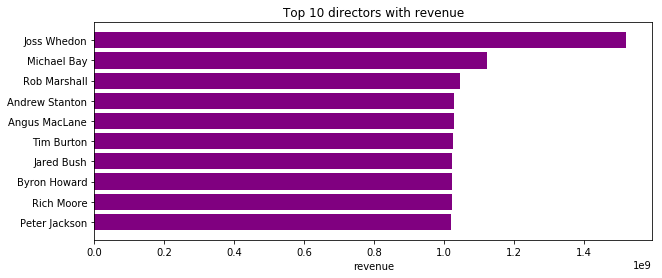

In [38]:
Director_df = crews_data[crews_data["job"]=="Director"]
name = Director_df['name'].tolist()
revenue = Director_df['revenue'].tolist()
arr = np.array(revenue)
index = arr.argsort()[-10:][::-1]
max_10_revenue = [revenue[i] for i in index] 
max_10_name = [name[i] for i in index]
fig = plt.figure(figsize=(10, 4))
data = dict(zip(max_10_name,max_10_revenue))
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('revenue')
plt.title('Top 10 directors with revenue')
plt.savefig('Images\Top revenue directors.png')
plt.show()

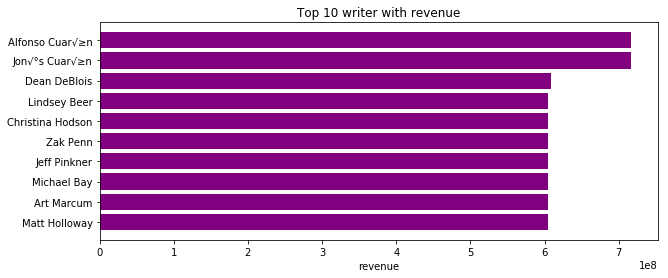

In [39]:
Writer_df = crews_data[crews_data["job"]=="Writer"]
name = Writer_df['name'].tolist()
revenue = Writer_df['revenue'].tolist()
arr = np.array(revenue)
index = arr.argsort()[-10:][::-1]
max_10_revenue = [revenue[i] for i in index] 
max_10_name = [name[i] for i in index]
fig = plt.figure(figsize=(10, 4))
data = dict(zip(max_10_name,max_10_revenue))
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('revenue')
plt.title('Top 10 writer with revenue')
plt.savefig('Images\Top revenue writer.png')
plt.show()

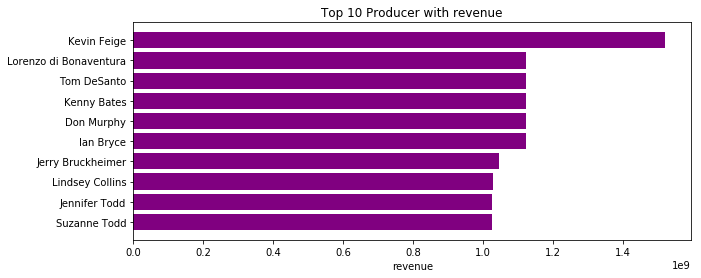

In [41]:
Producer_df = crews_data[crews_data["job"]=="Producer"]
name = Producer_df['name'].tolist()
revenue = Producer_df['revenue'].tolist()
arr = np.array(revenue)
index = arr.argsort()[-10:][::-1]
max_10_revenue = [revenue[i] for i in index] 
max_10_name = [name[i] for i in index]
fig = plt.figure(figsize=(10, 4))
data = dict(zip(max_10_name,max_10_revenue))
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('revenue')
plt.title('Top 10 Producer with revenue')
plt.savefig('Images\Top revenue Producer.png')
plt.show()

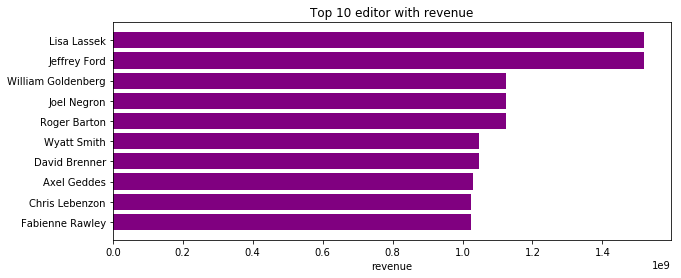

In [42]:
Editor_df = crews_data[crews_data["job"]=="Editor"]
name = Editor_df['name'].tolist()
revenue = Editor_df['revenue'].tolist()
arr = np.array(revenue)
index = arr.argsort()[-10:][::-1]
max_10_revenue = [revenue[i] for i in index] 
max_10_name = [name[i] for i in index]
fig = plt.figure(figsize=(10, 4))
data = dict(zip(max_10_name,max_10_revenue))
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('revenue')
plt.title('Top 10 editor with revenue')
plt.savefig('Images\Top revenue editor.png')
plt.show()

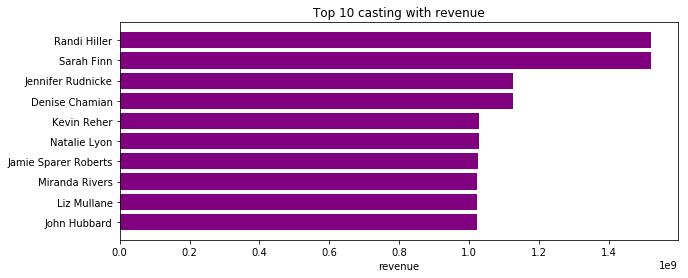

In [43]:
Casting_df = crews_data[crews_data["job"]=="Casting"]
name = Casting_df['name'].tolist()
revenue = Casting_df['revenue'].tolist()
arr = np.array(revenue)
index = arr.argsort()[-10:][::-1]
max_10_revenue = [revenue[i] for i in index] 
max_10_name = [name[i] for i in index]
fig = plt.figure(figsize=(10, 4))
data = dict(zip(max_10_name,max_10_revenue))
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='purple')
plt.xlabel('revenue')
plt.title('Top 10 casting with revenue')
plt.savefig('Images\Top revenue casting.png')
plt.show()